# Personal Information:
- Name: Abdul Raheem Shahzad
- Email_1: abdul.raheem.colab@gmail.com
- Email_2: abdul_raheem.shahzad.bsse-2018a@cecosian.edu.pk

## Table of Contents:

### Assignment: Expand the location.
### Assignment: Check unstack()

16. Spltiing a string into multiple columns

17. Aggregate by multiple groups/ functions
18. Select specific row and columns
19. Reshape multi-index Series
20. Contnous data sai categorical mai convert kare
21. Convert one set of values into anotherone
22. transpose a wide dataframe
23. Reshape the dataframe


## 16- splitting a string into multiple coulumns
#### import libraries

In [13]:
#import libraries
import pandas as pd
df = pd.DataFrame({'name':['Abdul raheem','sajad ali','subman gil'],
                   'location':['Peshawar, Pakistan','lahore, Pakistan','mumbai, india'],})
df

,name,location
0,Abdul raheem,"Peshawar, Pakistan"
1,sajad ali,"lahore, Pakistan"
2,subman gil,"mumbai, india"


# expand on the basis of space ' '

In [14]:
df.name.str.split(' ', expand = True)

,0,1
0,Abdul,raheem
1,sajad,ali
2,subman,gil


In [15]:
#adding those splits in those new columns
df[['first name','last name']] = df.name.str.split(' ', expand = True)

In [16]:
df

,name,location,first name,last name
0,Abdul raheem,"Peshawar, Pakistan",Abdul,raheem
1,sajad ali,"lahore, Pakistan",sajad,ali
2,subman gil,"mumbai, india",subman,gil


## Assignment_1:
- To split City and Country

In [17]:
locate=df[['City','Country']] = df.location.str.split(',', expand = True)
locate

,0,1
0,Peshawar,Pakistan
1,lahore,Pakistan
2,mumbai,india


In [18]:
df= df[['first name','last name','City','Country']]
df

,first name,last name,City,Country
0,Abdul,raheem,Peshawar,Pakistan
1,sajad,ali,lahore,Pakistan
2,subman,gil,mumbai,india


# 17- Aggregate by multiple groups/ functions

In [19]:
# libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Gruop by sex and count them

In [24]:
df.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


### Group by who and sum them

In [25]:
df.groupby('who').sum()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


#### Checking lengths

In [27]:
len(df.groupby('who'))

3

In [29]:
len(df.groupby('pclass'))

3

In [34]:
df.groupby(['sex','pclass','embarked']).count()

survived  age  sibsp  parch  fare  class  who  \
sex    pclass embarked                                                  
female 1      C               43   38     43     43    43     43   43   
              Q                1    1      1      1     1      1    1   
              S               48   44     48     48    48     48   48   
       2      C                7    7      7      7     7      7    7   
              Q                2    1      2      2     2      2    2   
              S               67   66     67     67    67     67   67   
       3      C               23   16     23     23    23     23   23   
              Q               33   10     33     33    33     33   33   
              S               88   76     88     88    88     88   88   
male   1      C               42   36     42     42    42     42   42   
              Q                1    1      1      1     1      1    1   
              S               79   64     79     79    79     79   79   
       2      C               10    8     10     10    10     10   10   
              Q                1    1      1      1     1      1    1   
              S               97   90     97     97    97     97   97   
       3      C               43   25     43     43    43     43   43   
              Q               39   14     39     39    39     39   39   
              S              265  214    265    265   265    265  265   

                        adult_male  deck  embark_town  alive  alone  
sex    pclass embarked                                               
female 1      C                 43    35           43     43     43  
              Q                  1     1            1      1      1  
              S                 48    43           48     48     48  
       2      C                  7     1            7      7      7  
              Q                  2     1            2      2      2  
              S                 67     8           67     67     67  
       3      C                 23     1           23     23     23  
              Q                 33     0           33     33     33  
              S                 88     5           88     88     88  
male   1      C                 42    31           42     42     42  
              Q                  1     1            1      1      1  
              S                 79    62           79     79     79  
       2      C                 10     1           10     10     10  
              Q                  1     0            1      1      1  
              S                 97     5           97     97     97  
       3      C                 43     0           43     43     43  
              Q                 39     1           39     39     39  
              S                265     5          265    265    265

# 18- select specific row and columns

In [35]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df[['sex','class','deck']]

,sex,class,deck
0,male,Third,NaN
1,female,First,C
2,female,Third,NaN
3,female,First,C
4,male,Third,NaN
...,...,...,...
886,male,Second,NaN
887,female,First,B
888,female,Third,NaN
889,male,First,C


In [39]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Select these four properties from stattistics

In [40]:
df.describe().loc[['min','25%','50%','75%','max']]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


#### all columns between min and max

In [44]:
df.describe().loc['min':'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


#### want to see rows from min: to : maxm, columns from surived to age

In [48]:
df.describe().loc['min':'max', 'survived':'age' ]

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


# 19- Reshape multi-index Series

In [49]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
df.survived.mean()

0.3838383838383838

In [51]:
df.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

### Important one is below

In [61]:
df.groupby(['sex','pclass']).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

## Assignment; Unstack()

In [62]:
df.groupby(['sex','pclass']).survived.mean().unstack()

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [55]:
df.unstack()

survived  0          0
          1          1
          2          1
          3          1
          4          0
                 ...  
alone     886     True
          887     True
          888    False
          889     True
          890     True
Length: 13365, dtype: object

# 20- Contnous data sai categorical mai convert kare

In [63]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [64]:
df.age.head()# it is continouis

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

## Encoding

In [65]:
pd.cut(df.age, bins = [0,18,25,99], labels=['child','Young Adult','Adult']).head()

0    Young Adult
1          Adult
2          Adult
3          Adult
4          Adult
Name: age, dtype: category
Categories (3, object): ['child' < 'Young Adult' < 'Adult']

In [66]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [67]:
df['new_age'] = pd.cut(df.age, bins = [0,18,25,99], labels=['child','Young Adult','Adult'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult


# 21- Convert one set of values into anotherone

In [68]:

df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

### Performing feature engineering

In [71]:
# feature engineering
df['sex_num']=df.sex.map({'male':0,'female':1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,0


In [74]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [75]:
df.embarked.factorize()[0]

array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
        0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
        0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
        0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0

### EMbarked ki encoding kar li hai

In [77]:
df['embarked_num']=df.embarked.factorize()[0]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,0,0


# 22- transpose a wide dataframe

In [78]:
#
import numpy as np
import pandas as pd


### Generating Random Dataset

In [80]:
df = pd.DataFrame(np.random.rand(200,25),columns=list('abcdefghijklmnopqrstuvwxy'))
df.head()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.924377,0.241485,0.671571,0.429431,0.609808,0.375093,0.857879,0.406792,0.626718,0.885097,...,0.690594,0.080035,0.262899,0.650893,0.933130,0.799694,0.997045,0.984973,0.154509,0.322783
1,0.275178,0.828508,0.196564,0.209602,0.212348,0.724015,0.714145,0.044699,0.140405,0.080608,...,0.100726,0.241413,0.535230,0.898010,0.277338,0.102836,0.409486,0.627102,0.040307,0.511342
2,0.199732,0.791227,0.797907,0.365360,0.385735,0.782972,0.141027,0.860168,0.926898,0.100196,...,0.022463,0.104384,0.257338,0.696352,0.759590,0.422600,0.143908,0.338989,0.682006,0.228751
3,0.578338,0.333324,0.470871,0.872766,0.330775,0.762807,0.551693,0.012129,0.237465,0.005342,...,0.751960,0.316200,0.266508,0.373566,0.290329,0.826965,0.286507,0.889637,0.549813,0.857482
4,0.501948,0.662421,0.480631,0.644899,0.667012,0.023830,0.083473,0.749586,0.324487,0.740565,...,0.966674,0.993681,0.806169,0.826316,0.107127,0.833460,0.408992,0.912847,0.374035,0.848272


### .T is used for transpose

In [81]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
a,0.924377,0.275178,0.199732,0.578338,0.501948,0.171772,0.520996,0.569981,0.163374,0.854928
b,0.241485,0.828508,0.791227,0.333324,0.662421,0.638742,0.738989,0.682808,0.592899,0.613055
c,0.671571,0.196564,0.797907,0.470871,0.480631,0.302500,0.933728,0.812494,0.544344,0.382499
d,0.429431,0.209602,0.365360,0.872766,0.644899,0.643409,0.120024,0.662626,0.484164,0.219023
e,0.609808,0.212348,0.385735,0.330775,0.667012,0.696756,0.092104,0.421358,0.054711,0.759775
f,0.375093,0.724015,0.782972,0.762807,0.023830,0.044743,0.866073,0.081801,0.361405,0.743871
g,0.857879,0.714145,0.141027,0.551693,0.083473,0.879387,0.483958,0.298755,0.992631,0.775526
h,0.406792,0.044699,0.860168,0.012129,0.749586,0.887097,0.489309,0.674596,0.788558,0.206858
i,0.626718,0.140405,0.926898,0.237465,0.324487,0.977151,0.658362,0.686545,0.179632,0.013451
j,0.885097,0.080608,0.100196,0.005342,0.740565,0.805129,0.086679,0.680173,0.279430,0.404473


In [83]:
# easier to read
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,200.0,0.492213,0.302983,0.001845,0.207292,0.459340,0.797616,0.997208
b,200.0,0.512520,0.274807,0.001042,0.275729,0.533814,0.734159,0.993414
c,200.0,0.499157,0.281241,0.003274,0.283096,0.470591,0.758818,0.996203
d,200.0,0.483898,0.281863,0.003312,0.224953,0.505564,0.700314,0.991361
e,200.0,0.514798,0.297396,0.011750,0.293057,0.523336,0.756775,0.995036
f,200.0,0.531925,0.270982,0.015274,0.318760,0.544141,0.763923,0.987920
g,200.0,0.504927,0.283203,0.007091,0.280595,0.507809,0.747381,0.995419
h,200.0,0.517968,0.299128,0.009714,0.245184,0.518760,0.784857,0.997992
i,200.0,0.510210,0.273536,0.008131,0.301473,0.502947,0.730932,0.993172
j,200.0,0.488371,0.295936,0.005082,0.246151,0.491503,0.744625,0.995712


# 23- Reshape the dataframe

#### Making dataframe

In [84]:
fasla = pd.DataFrame([['12345',100,200,300],['34567',400,500,600],['67890',700,800,900]],columns=['zip','factory','warehouse','retail'])
fasla.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [86]:
fasla.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [87]:
fasla2 = pd.DataFrame([[1,'12345','factory'],[2,'34567','warehouse']],columns=['user_id','zip','locaton_type'])
fasla2.head()

,user_id,zip,locaton_type
0,1,12345,factory
1,2,34567,warehouse


<AxesSubplot:xlabel='zip', ylabel='factory'>

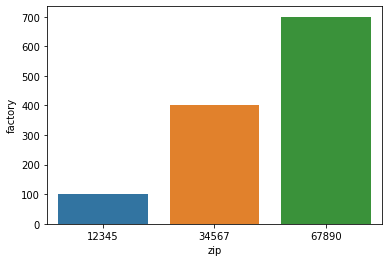

In [96]:
sns.barplot(x='zip',y='factory',data=fasla)

In [ ]:
sns.barplot(x='zip',y='factory',data=fasla)

In [90]:
fasla_long = fasla.melt(id_vars=['zip'],var_name='location_type',value_name='distance')

In [91]:
fasla_long

,zip,location_type,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<AxesSubplot:xlabel='location_type', ylabel='distance'>

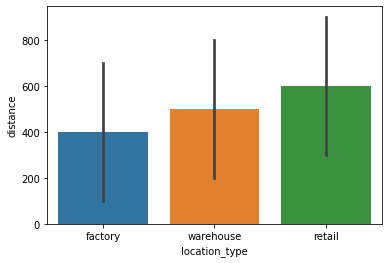

In [93]:
sns.barplot(x='location_type',y='distance',data=fasla_long)

<AxesSubplot:xlabel='zip', ylabel='distance'>

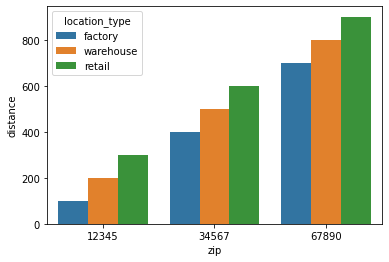

In [94]:
sns.barplot(x='zip',y='distance',hue='location_type', data=fasla_long)